# Proyecto Hackaton-MundosE

<br>

## Grupo 4


#### Area temática: *Tecnología*
#### Tema: *Despidos en las industrias tecnológicas*
<u>**Integrantes**</u>:
<ul>
  <li>Carrizo, Dante</li>
  <li>Luscher, Guillermo</li>
  <li>Millan, Joaquín</li>
  <li>Palacio, Alexis</li>
  <li>Romero,  Fernando</li>
</ul>

In [ ]:
# Importación de módulo "files" para carga de archivos al espacio de colab
from google.colab import files

In [ ]:
# Importación de librerías para tratamiento y visualización de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statistics import mode

In [ ]:
# Subida del archivo a trabajar a espacio de colab
# URL de descarga: https://www.kaggle.com/datasets/salimwid/technology-company-layoffs-20222023-data
upload3 = files.upload()

Saving tech_layoffs.csv to tech_layoffs.csv


In [ ]:
# Lectura del archivo ".csv" y primer exploración del dataset
df = pd.read_csv("tech_layoffs.csv", sep=",")
df.head(10)

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,NaN
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f..."
5,NextRoll,Unclear,3,7/8/2022,Marketing Tech,San Francisco,Business Insider,Private,NaN
6,Armis Security,25,4,12/8/2022,Cybersecurity,San Francisco,Calcalistech,Private,NaN
7,Foxtrot,26,4,9/23/2022,"food and beverage, e-commerce",Chicago,Chicago Business,Private,NaN
8,Headspace Health,50,4,12/14/2022,"telehealth, wellness",Los Angeles,Bloomberg,Private,NaN
9,RealSelf,11,5,7/21/2022,Beauty tech,Seattle,GeekWire,Private,NaN


In [ ]:
df.columns

Index(['company', 'total_layoffs', 'impacted_workforce_percentage',
       'reported_date', 'industry', 'headquarter_location', 'sources',
       'status', 'additional_notes'],
      dtype='object')

## Descripción de variables



*   "Company" ---> Nombre de la compañia.
*   "total_layoffs" ---> Despidos en total.
*   "impacted_workforce_percentage" ---> % de empleados impactados primer semestre 2022.
*   "reported_date" ---> Fecha de primer despido o anuncio de despidos.
*   "industry" ---> Información del segmento en donde opera la compañia.
*   "headquarter_location" ---> Ubicación de casa matriz.
*   "sources" ---> Fuente de información.
*   "status" ---> Si la compañia es pública o privada.
*   "additional_notes" ---> Detalles extra en los despidos.


In [ ]:
#Forma del dataframe
df.shape

(489, 9)

In [ ]:
# Exploración de la información del dataframe. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   company                        489 non-null    object
 1   total_layoffs                  489 non-null    object
 2   impacted_workforce_percentage  489 non-null    object
 3   reported_date                  489 non-null    object
 4   industry                       489 non-null    object
 5   headquarter_location           489 non-null    object
 6   sources                        489 non-null    object
 7   status                         489 non-null    object
 8   additional_notes               22 non-null     object
dtypes: object(9)
memory usage: 34.5+ KB


In [ ]:
# Conteo de valores de variable "industry"
df["industry"].value_counts()

Fintech                       24
Health Care                   17
PropTech                      15
E-commerce                    13
Cybersecurity                 10
                              ..
Enterprise Communication       1
AI                             1
Transporation, Logistics       1
Business development           1
enterprise tech, analytics     1
Name: industry, Length: 289, dtype: int64

In [ ]:
# Conteo de valores de variable "status"
df["status"].value_counts()

Private    370
Public     119
Name: status, dtype: int64

In [ ]:
# Conteo de valores de variable "headquartes". La mayoria son de USA: Mumbai, india Stockholm, Sweden Ottawa, Canada Tel Aviv 
df["headquarter_location"].unique()

array(['Leawood, KS', 'Los Angeles', 'Seattle', 'Mountain View, CA',
       'New York', 'San Francisco', 'Chicago', 'Bay Area, CA',
       'Mountain View', 'Pittsburgh', 'Boston', 'Miami', 'Mumbai, India',
       'Torrance, California', 'San Carlos, CA', 'San Diego', 'Detroit',
       'Bend, Oregon', 'Atlanta', 'Washington, DC', 'Austin',
       'Distributed', 'Boulder', 'Burlington, MA', 'Bellevue, WA',
       'Santa Barbara, CA', 'Hamilton, OH', 'San Mateo', 'Waterford, MI',
       'Stockholm', 'Louisville, CO', 'San Franicsco', 'Redwood City, CA',
       'Stamford, CT', 'Greater New York area', 'Palo Alto',
       'Williston, VT', 'Indianapolis', 'Denver', 'Minneapolis', 'Dever',
       'New York City', 'Boca Raton, FL', 'Fort Lauderdale, FL',
       'Hayward, California', 'Culver City', 'Englewood Cliffs, NJ',
       'Phoenix', 'Incline Village, NV', 'Sunnyvale, CA', 'San Jose',
       'Cincinnati', 'Palo Alto, CA', 'Nebraska City, NE', 'Dover, DE',
       'Hoboken, New Jersey', 'A

In [ ]:
df["additional_notes"].unique()

array([nan,
       'Per Axios, 22 of the employees laid off were from Thirty Madison, and two were from new parent company Nurx. Layoffs affected around 3% of employees.',
       'Layoffs affect employees in the U.S., Israel, and Japan. Layoffs affected around 13% of employees.',
       'Company did not respond to a request to confirm details of layoffs. Layoffs affected around 13% of employees.',
       'Nate reportedly had two layoffs. In June, the company laid of 30 people, or 20% of the company at the time.',
       'Outschool laid off 31 people, or 18% of the company, back in July. In December it laid off another 43 people, which amounted to 25% of the staff at the time.',
       'Rasa was founded in Berlin but moved its headquarters to San Francisco in 2019. Layoffs affected employees in the U.S., Germany, and U.K. Layoffs affected around 40% of employees.',
       'More than a dozen employees were reportedly laid off in July. In January, the company laid off more employees.',
  

### Limpieza de datos


In [ ]:
# Total de datos nulos en el dataset
df.isnull().sum()

company                            0
total_layoffs                      0
impacted_workforce_percentage      0
reported_date                      0
industry                           0
headquarter_location               0
sources                            0
status                             0
additional_notes                 467
dtype: int64

In [ ]:
# Total de datos nulos en la columna "additional_notes"
print(f"{df['additional_notes'].isnull().sum()/df.shape[0]:.2%}")

95.50%


In [ ]:
# Conteo de valores de variable "total_layoffs"
df["total_layoffs"].value_counts()

Unclear    182
100         17
30          12
40          11
150          8
          ... 
111          1
5000         1
64           1
262          1
9090         1
Name: total_layoffs, Length: 150, dtype: int64

In [ ]:
#182 compañias no tienen claro el total de despidos. Eliminarlas
df[df["total_layoffs"]=="Unclear"]

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,NaN
5,NextRoll,Unclear,3,7/8/2022,Marketing Tech,San Francisco,Business Insider,Private,NaN
18,Outreach,Unclear,5,8/2/2022,Sales Tech,Seattle,LinkedIn,Private,NaN
19,Boosted Commerce,Unclear,5,7/25/2022,E-commerce,Los Angeles,Business Insider,Private,NaN
20,Forward,Unclear,5,7/11/2022,Health Care,San Francisco,Fierce Healthcare,Private,NaN
...,...,...,...,...,...,...,...,...,...
464,Starry,Unclear,74,1/18/2023,"WiFi, hardware",Boston,SEC filings,Public,NaN
485,Oracle,Unclear,Unclear,8/1/2022,"SaaS, enterprise software",Austin,The Information,Public,The Information reported thousands of people w...
486,LivePerson,Unclear,Unclear,9/15/2022,Customer service,New York,LinkedIn,Public,NaN
487,Skillz,Unclear,Unclear,8/29/2022,"Mobile Apps, Gaming",San Francisco,Seeking Alpha,Public,NaN


In [ ]:
rows_to_drop = df[df['total_layoffs'].str.contains('Unclear')].index
df = df.drop(rows_to_drop)
df

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f..."
6,Armis Security,25,4,12/8/2022,Cybersecurity,San Francisco,Calcalistech,Private,NaN
...,...,...,...,...,...,...,...,...,...
480,HashiCorp,69,Unclear,1/11/2023,"cybersecurity, cloud infrastructure",San Francisco,Crunchbase News Reporting,Public,NaN
481,Quanergy Systems,72,Unclear,12/14/2022,Autonomous vehicles,"Sunnyvale, CA",Silicon Valley Business Journal,Public,NaN
482,Doma,825,Unclear,12/6/2022,"Insurtech, machine learning",San Francsico,Doma,Public,The company previously laid off workers in May.
483,Wayfair,870,Unclear,8/19/2022,"E-commerce, retail",Boston,Boston Globe,Public,NaN


In [ ]:
#67 compañias no tienen claro el total de % impactado, reemplazarlos por 0
df[df["impacted_workforce_percentage"]=="Unclear"]

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
260,100 Thieves,12,Unclear,1/10/2023,"eSports, Media",Los Angeles,Dexerto,Private,More than a dozen employees were reportedly la...
261,Orbit,14,Unclear,8/12/2022,Productivity software,San Francisco,Orbit CEO Patrick Woods,Private,Orbit CEO Patrick Woods announced at least 14 ...
262,Cybereason,100,Unclear,6/1/2022,Cybersecurity,Boston,CTech,Private,"Affected employees are in U.S., Israel, and Eu..."
263,Progrexion,100,Unclear,6/7/2022,FinTech,Salt Lake City,Crunchbase News,Private,NaN
264,Gem,100,Unclear,11/2/2022,Recruiting,San Francisco,Gem CEO,Private,NaN
...,...,...,...,...,...,...,...,...,...
480,HashiCorp,69,Unclear,1/11/2023,"cybersecurity, cloud infrastructure",San Francisco,Crunchbase News Reporting,Public,NaN
481,Quanergy Systems,72,Unclear,12/14/2022,Autonomous vehicles,"Sunnyvale, CA",Silicon Valley Business Journal,Public,NaN
482,Doma,825,Unclear,12/6/2022,"Insurtech, machine learning",San Francsico,Doma,Public,The company previously laid off workers in May.
483,Wayfair,870,Unclear,8/19/2022,"E-commerce, retail",Boston,Boston Globe,Public,NaN


In [ ]:
df["impacted_workforce_percentage"].replace("Unclear",None, inplace = True)

In [ ]:
# Transformar el df al tipo de formato correspondiente
df["total_layoffs"]=df["total_layoffs"].astype(int)
df["impacted_workforce_percentage"]=df["impacted_workforce_percentage"].astype(float)

In [ ]:
# Eliminación de la columna "additional_notes" debido a que
df.drop("additional_notes", axis=1, inplace=True)
df.head()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status
0,C2FO,20,2.0,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private
2,Amperity,13,3.0,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private
3,Addepar,20,3.0,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private
4,Thirty Madison,24,3.0,5/13/2022,Health Care,New York,Axios,Private
6,Armis Security,25,4.0,12/8/2022,Cybersecurity,San Francisco,Calcalistech,Private


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 484
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   company                        307 non-null    object 
 1   total_layoffs                  307 non-null    int64  
 2   impacted_workforce_percentage  240 non-null    float64
 3   reported_date                  307 non-null    object 
 4   industry                       307 non-null    object 
 5   headquarter_location           307 non-null    object 
 6   sources                        307 non-null    object 
 7   status                         307 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 21.6+ KB


### Features del dataset

In [ ]:
# Trabajo con fechas

df['reported_date'] = pd.to_datetime(df['reported_date'], format="%m/%d/%Y")

# Descomposición de las fechas.
df['Month'] = df['reported_date'].dt.month
df['Year'] = df['reported_date'].dt.year
df['Day'] = df['reported_date'].dt.day
df['Week_Day'] = df['reported_date'].dt.strftime("%A")

def day_int(x):
    if x <= 5:
        return 'Begin'
    elif x >=24:
        return 'End'
    else:
        return 'Middle'

df['Dem_Int'] = df['Day'].apply(lambda x: day_int(x))
df.head()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,Month,Year,Day,Week_Day,Dem_Int
0,C2FO,20,2.0,2022-12-09,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,12,2022,9,Friday,Middle
2,Amperity,13,3.0,2022-08-20,"Saas, analytics",Seattle,Geekwire,Private,8,2022,20,Saturday,Middle
3,Addepar,20,3.0,2023-01-18,"fintech, data analytics","Mountain View, CA",Fortune,Private,1,2023,18,Wednesday,Middle
4,Thirty Madison,24,3.0,2022-05-13,Health Care,New York,Axios,Private,5,2022,13,Friday,Middle
6,Armis Security,25,4.0,2022-12-08,Cybersecurity,San Francisco,Calcalistech,Private,12,2022,8,Thursday,Middle


In [ ]:
df.Year.unique()

array([2022, 2023])

In [ ]:
# Creación de empleados totales teniendo en cuenta el % de empleados afectados por layoffs
df["Empleados_totales"]=round((df["total_layoffs"]*100)/df["impacted_workforce_percentage"],2)
df.head()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,Month,Year,Day,Week_Day,Dem_Int,Empleados_totales
0,C2FO,20,2.0,2022-12-09,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,12,2022,9,Friday,Middle,1000.00
2,Amperity,13,3.0,2022-08-20,"Saas, analytics",Seattle,Geekwire,Private,8,2022,20,Saturday,Middle,433.33
3,Addepar,20,3.0,2023-01-18,"fintech, data analytics","Mountain View, CA",Fortune,Private,1,2023,18,Wednesday,Middle,666.67
4,Thirty Madison,24,3.0,2022-05-13,Health Care,New York,Axios,Private,5,2022,13,Friday,Middle,800.00
6,Armis Security,25,4.0,2022-12-08,Cybersecurity,San Francisco,Calcalistech,Private,12,2022,8,Thursday,Middle,625.00


In [ ]:
# Verificando si el tipo de datos de las columnas es numérico o no
from pandas.api.types import is_numeric_dtype

num_cols = ['total_layoffs','impacted_workforce_percentage']
cols = df.columns
for i in cols:
    if is_numeric_dtype(df[i]) == False:
        print(i)

company
reported_date
industry
headquarter_location
sources
status
Week_Day
Dem_Int


In [ ]:
# Formateo de la columna "industry"
ind = []
for i in df['industry'].to_list():
    ind.append(i.split(' ')[-1])
    
ind = [x.title() for x in ind]
ind = [x.replace("-", "") for x in ind]

df['industry'] = ind
print(df['industry'].unique())

['Payments' 'Analytics' 'Care' 'Cybersecurity' 'ECommerce' 'Wellness'
 'Tech' 'Software' 'Crypto' 'Transportation' 'Ecommerce' 'Logistics'
 'Cryptocurrency' 'Productivity' 'Insurtech' 'Games' 'Fintech' 'Retail'
 'Robotics' 'Finance' 'Cannabis' 'Ar' 'Media/Entertainment' 'Journalism'
 'Media' 'Saas' 'Learning' 'Enterprise' 'Security' 'Processing' 'Proptech'
 'Crowdfunding' 'Automation' 'Transfer' 'Intelligence' 'Creators'
 'Collection' 'Recruiting' 'Marketplace' 'Infrastructure' 'Gaming'
 'Marketing' 'Storage' 'Energy' 'Edtech' 'Ai' 'Services' 'Banking' 'News'
 'Blockchain' 'Apis' 'Communication' 'Development' 'Benefits'
 'Verification' 'Telehealth' 'Iot' 'Fitness' 'Transporation' 'Beverage'
 'Event' 'Hospitality' 'Diagnostics' 'Estate' 'Beauty' 'Health' 'Travel'
 'Hotels' 'Surveillance' 'Trials' 'Advertising' 'Events' 'Service'
 'Automotive' 'Api' 'Network' 'It' 'Management' 'Music' 'Streaming'
 'Computing' 'Biotech' 'Tools' 'Hosting' 'Pharmaceuticals' 'Delivery'
 'Insurance' 'Pens' 'W

In [ ]:
# Formateo de la columna "headquarter_location"
ind = []
for i in df['headquarter_location'].to_list():
    ind.append(i.split(',')[-1])
    
ind = [x.upper() for x in ind]
ind = [x.replace("-", "") for x in ind]

df['headquarter_location'] = ind

In [ ]:
df

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,Month,Year,Day,Week_Day,Dem_Int,Empleados_totales
0,C2FO,20,2.0,2022-12-09,Payments,KS,Kansas City Business Journal,Private,12,2022,9,Friday,Middle,1000.00
2,Amperity,13,3.0,2022-08-20,Analytics,SEATTLE,Geekwire,Private,8,2022,20,Saturday,Middle,433.33
3,Addepar,20,3.0,2023-01-18,Analytics,CA,Fortune,Private,1,2023,18,Wednesday,Middle,666.67
4,Thirty Madison,24,3.0,2022-05-13,Care,NEW YORK,Axios,Private,5,2022,13,Friday,Middle,800.00
6,Armis Security,25,4.0,2022-12-08,Cybersecurity,SAN FRANCISCO,Calcalistech,Private,12,2022,8,Thursday,Middle,625.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,HashiCorp,69,NaN,2023-01-11,Infrastructure,SAN FRANCISCO,Crunchbase News Reporting,Public,1,2023,11,Wednesday,Middle,NaN
481,Quanergy Systems,72,NaN,2022-12-14,Vehicles,CA,Silicon Valley Business Journal,Public,12,2022,14,Wednesday,Middle,NaN
482,Doma,825,NaN,2022-12-06,Learning,SAN FRANCSICO,Doma,Public,12,2022,6,Tuesday,Middle,NaN
483,Wayfair,870,NaN,2022-08-19,Retail,BOSTON,Boston Globe,Public,8,2022,19,Friday,Middle,NaN


-----------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 484
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   company                        307 non-null    object        
 1   total_layoffs                  307 non-null    int64         
 2   impacted_workforce_percentage  240 non-null    float64       
 3   reported_date                  307 non-null    datetime64[ns]
 4   industry                       307 non-null    object        
 5   headquarter_location           307 non-null    object        
 6   sources                        307 non-null    object        
 7   status                         307 non-null    object        
 8   Month                          307 non-null    int64         
 9   Year                           307 non-null    int64         
 10  Day                            307 non-null    int64         
 11  Week_Day           

In [ ]:
# Calculo del total de despidos, el total de empleados y el procentaje de despidos del dataset
despidos_totales=df["total_layoffs"].sum()
print(f"Despidos totales = ",  despidos_totales)
total_empleados=df["Empleados_totales"].sum()
print(f"Empleados_totales = ",  total_empleados)
print("Porcentaje total de despidos industria tech = ",round((despidos_totales/total_empleados)*100,2))

Despidos totales =  138156
Empleados_totales =  906245.66
Porcentaje total de despidos industria tech =  15.24


In [ ]:
# Generación de una tabla dinámica que contenga los despidos totales, los empleados totales y el % de despidos por industria
df3 =(df.groupby("industry")["total_layoffs","Empleados_totales"].sum()).sort_values("total_layoffs", ascending=False).reset_index()
df3["%_de_despidos"]=round((df3["total_layoffs"]/df3["Empleados_totales"])*100,2)
df3.head(20)

<ipython-input-35-247831a93c82>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3 =(df.groupby("industry")["total_layoffs","Empleados_totales"].sum()).sort_values("total_layoffs", ascending=False).reset_index()


,industry,total_layoffs,Empleados_totales,%_de_despidos
0,Saas,22342,443420.00,5.04
1,Media,16367,97846.61,16.73
2,Software,13311,61414.29,21.67
3,Services,12176,1380.00,882.32
4,Fintech,10594,34022.35,31.14
5,Analytics,9572,5324.76,179.76
6,Ecommerce,6220,38690.47,16.08
7,ECommerce,4571,17449.80,26.20
8,Fitness,4486,1648.57,272.11
9,Proptech,4233,21345.60,19.83


In [ ]:
# Generación de una tabla dinámica que contenga los despidos totales, los empleados totales y el % de despidos por localización
df5 =(df.groupby("headquarter_location")["total_layoffs","Empleados_totales"].sum()).sort_values("total_layoffs", ascending=False).reset_index()
df5["%_de_despidos"]=round((df5["total_layoffs"]/df5["Empleados_totales"])*100,2)
df5.head(20)

<ipython-input-37-579699dd2a37>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df5 =(df.groupby("headquarter_location")["total_layoffs","Empleados_totales"].sum()).sort_values("total_layoffs", ascending=False).reset_index()


,headquarter_location,total_layoffs,Empleados_totales,%_de_despidos
0,CA,32155,213316.56,15.07
1,SAN FRANCISCO,30745,113512.22,27.09
2,SEATTLE,30477,387646.78,7.86
3,NEW YORK,15583,36007.25,43.28
4,TEMPE,4000,0.00,inf
5,PHILADELPHIA,2300,0.00,inf
6,CHICAGO,1840,11345.75,16.22
7,BOSTON,1661,6967.07,23.84
8,LOS ANGELES,1123,5774.02,19.45
9,MENLO PARK,1114,3170.70,35.13


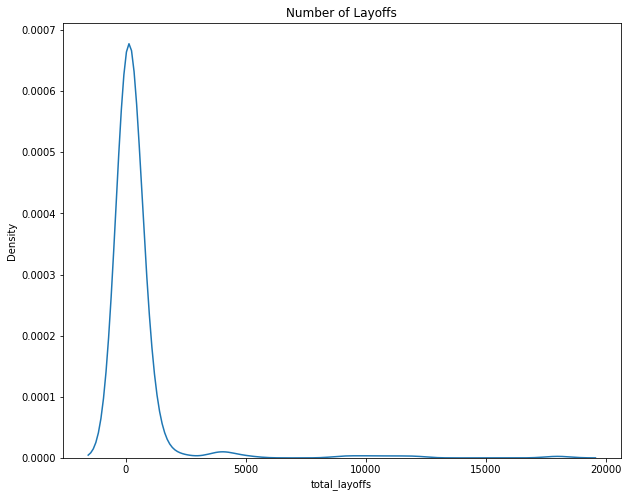

In [ ]:
# Inspeccionamos el comportamiento de la columna "total_layoffs"
plt.figure(figsize=(10,8))
sns.kdeplot(x=df['total_layoffs'])
plt.title('Number of Layoffs')
plt.show()

<Axes: >

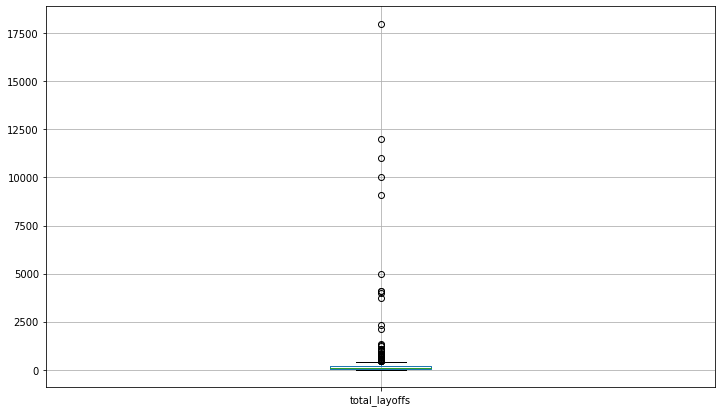

In [ ]:
# Exploración de Total de Despidos
df.boxplot("total_layoffs", figsize=(12,7))

In [ ]:
# CREACIOÓN DE FUNCIÓN DE VISUALIZACIÓN DE DATOS RESÚMEN
def imagen_0(dte,column,title):
    """
    Gráfico de disperción 

    """
    # ------------- Configuración de Figura
    figura = plt.figure(figsize=(15,8))
    figura.suptitle(title, fontsize=30, color='grey')
    figura.subplots_adjust(hspace=0.3)
    tamanio = (2,2)
    dt = dte.copy()
    # Eliminación de datos "Unclear". 
    dt = dt.replace('Unclear',None).dropna().reset_index(drop=True).astype(int)
    bbox = dict(boxstyle='round', facecolor='white', alpha=0.5)
    # -------------- Box -==================================
    ## Ax 
    pos = (0,0)
    ax1 = plt.subplot2grid(tamanio, pos,colspan=2)

    ## Plot
    box = sns.boxplot(
      orient='h',
      x = dt.values,
      ax= ax1,
      width = 0.3,
      boxprops= {"facecolor": (.4, .6, .8, .5), "edgecolor": "grey", "linewidth": 0.5}, # Color del box y color de los bordes del box
      whiskerprops={"color": "grey", "linewidth": 0.5}, # Color de las lineas encima y abajo de q1 e q3
      capprops={"color": "grey", "linewidth": 0.5}, # Color de la barra limite 
      medianprops={"color": "grey", "linewidth": 0.5} # Propiedades de la mediana
    )

    box.set_title('Gráfico de cajas',horizontalalignment='left', x=0,fontsize=16,color='grey')

    ## Configuración
    quantiles = dt.quantile([0.25, 0.75]).values.tolist()
    LI = quantiles[0] - ((quantiles[1] - quantiles[0])*1.5)
    LS = quantiles[1] + ((quantiles[1] - quantiles[0])*1.5)
    if LI < dt.min():
        LI = dt.min()
    if LS > dt.max():
        LS = dt.max()

    text = f"Lim. Inf. = {LI}\n50% range [{quantiles[0]} => {quantiles[1]}]\nLim. Sup. = {LS}"
    box.annotate(text, xy=(dt.max()/2, -0.2), fontsize=13, color='black', horizontalalignment='center', bbox=bbox)
    box.set_xlabel('Valores', horizontalalignment='left', x=0, fontsize=10, color='black')
    box.spines['top'].set_visible(False)
    box.spines['right'].set_visible(False)
    box.spines['left'].set_color('darkgrey')
    box.spines['bottom'].set_color('darkgrey')
    box.tick_params(axis='both', colors='darkgrey')    
    
    # -------------- Histograma ==================================
    ## Ax 
    pos = (1,0)
    ax2 = plt.subplot2grid(tamanio, pos,colspan=2)

    ## Plot
    hist = sns.histplot(
            x = dt.values,
            ax = ax2,
            bins=20,
            color='skyblue',
            stat="density",
    )
    sns.kdeplot(data=dt, color='red')

    hist.spines['top'].set_visible(False)
    hist.spines['right'].set_visible(False)
    hist.spines['left'].set_color('darkgrey')
    hist.spines['bottom'].set_color('darkgrey')
    hist.tick_params(axis='both', colors='darkgrey')

    hist.set_xlabel(column, horizontalalignment='left', x=0, fontsize=10, color='black')

    hist.set_title('Histograma',horizontalalignment='left', x=0, fontsize=16,color='grey')
    return plt.show()
    
       
def bar_company(dte,title,hm):
    dt = dte.copy()
    plt.figure(figsize=(15,5))
    dt['total_layoffs'] = dt['total_layoffs'].replace('Unclear',None)
    dt = dt[['company','total_layoffs']].dropna().reset_index(drop=True)
    dt['total_layoffs'] = dt['total_layoffs'].astype(int) 
    dt = pd.DataFrame(dt.groupby(['company'])['total_layoffs'].sum()).sort_values(by='total_layoffs',ascending=False)
    
    fig = sns.barplot( x=dt['total_layoffs'][:hm], y=dt.index[:hm], palette='flare_r')
    for n,i in enumerate(fig.patches):
        x = i.get_width()
        if n > 3:
            k = 1.02
        else:
            k = 1
        fig.annotate(x,
                    xy = (x*k, n),
                    horizontalalignment='left',
                    verticalalignment='center')
        
    fig.set_title(title, fontsize=30, color='dimgrey',horizontalalignment='left', x=0, y=1.05)   
    fig.tick_params(axis='x', colors='darkgrey')
    return plt.show()

def bar_field(dte,title, hm):
    dt = dte.copy()
    plt.figure(figsize=(15,5))
    dt['total_layoffs'] = dt['total_layoffs'].replace('Unclear',None)
    dt = dt[['industry','total_layoffs']].dropna().reset_index(drop=True)
    dt['total_layoffs'] = dt['total_layoffs'].astype(int) 
    dt = pd.DataFrame(dt.groupby(['industry'])['total_layoffs'].sum()).sort_values(by='total_layoffs',ascending=False)
    
    fig = sns.barplot( x=dt['total_layoffs'][:hm], y=dt.index[:hm], palette='rocket')
    for n,i in enumerate(fig.patches):
        x = i.get_width()
        if n > 3:
            k = 1.02
        else:
            k = 1
        fig.annotate(x,
                    xy = (x*k, n),
                    horizontalalignment='left',
                    verticalalignment='center')
        
    fig.set_title(title, fontsize=30, color='dimgrey',horizontalalignment='left', x=0, y=1.05)   
    fig.tick_params(axis='x', colors='darkgrey')
    return plt.show()

def bar_sourc(dte,title,hm):
    dt = dte.copy()
    plt.figure(figsize=(15,5))
    dt = dt['sources'].value_counts()[:hm]
    
    fig = sns.barplot( x=dt.values, y=dt.index, palette='rocket')
    
    for n,i in enumerate(fig.patches):
        x = i.get_width()
        if n > 3:
            k = 1.02
        else:
            k = 1
        fig.annotate(x,
                    xy = (x*k, n),
                    horizontalalignment='left',
                    verticalalignment='center')

    fig.set_title(title, fontsize=30, color='dimgrey',horizontalalignment='left', x=0, y=1.05)   
    fig.tick_params(axis='x', colors='darkgrey')
    return plt.show()

def bar_loc(dte,title,hm):
    dt = dte.copy()
    plt.figure(figsize=(15,5))
    dt = dt['headquarter_location'].value_counts()[:hm]
    
    fig = sns.barplot( x=dt.values, y=dt.index, palette='rocket')
    
    for n,i in enumerate(fig.patches):
        x = i.get_width()
        if n > 3:
            k = 1.02
        else:
            k = 1
        fig.annotate(x,
                    xy = (x*k, n),
                    horizontalalignment='left',
                    verticalalignment='center')

    fig.set_title(title, fontsize=30, color='dimgrey',horizontalalignment='left', x=0, y=1.05)   
    fig.tick_params(axis='x', colors='darkgrey')
    return plt.show()

def typ_loc(dtc, title):
    dt = dtc.copy()
    tamanio = (1,2)
    figura = plt.figure(figsize=(20,7))
    figura.suptitle(title, fontsize=24, color='dimgrey') 
    
    # ----------
    pos = (0,0)
    ax = plt.subplot2grid(tamanio, pos)
    vc = dt['status']
    fig = sns.countplot(x =dt['status'],palette='Greens')
    for n,i in enumerate(fig.patches):
        x = i.get_height()
        if n > 3:
            k = 1.02
        else:
            k = 1
        fig.annotate(x,
                    xy = (n, x),
                    horizontalalignment='center',
                    verticalalignment='bottom', size=15)    
    fig.set_ylim([0, 500])
    fig.tick_params(left=False, labelleft=False)
    fig.set_xlabel('')
    fig.set_title('Estado', x=0, color='grey', horizontalalignment='left')
    # ----------
    pos = (0,1)
    ax = plt.subplot2grid(tamanio, pos)
    vc = dt['headquarter_location'].value_counts()[:10]
    fig = sns.barplot(y = vc.index, x = vc.values, palette='GnBu')
    for n,i in enumerate(fig.patches):
        x = i.get_width()
        if n > 3:
            k = 1.02
        else:
            k = 1
        fig.annotate(int(x),
                    xy = (x*k, n),
                    horizontalalignment='left',
                    verticalalignment='center')
    fig.set_xlim([0, 155])
    fig.tick_params(bottom=False, labelbottom=False)
    fig.set_title('Ciudades', x=0, color='grey', horizontalalignment='left')
    fig.set_xlabel('Conteo')
    return plt.show()


def time_vis(dtc,title):
    figura = plt.figure(figsize=(15,20))
    figura.subplots_adjust(hspace=0.3, wspace=0.3)
    dt = dtc.copy()
    tamanio = (4,2)
    rows=2
    cols=2
    figura.suptitle(title, fontsize=30, color='dimgrey', y=0.96) 
    cs = ['Year','Month','Week_Day','Dem_Int']
    c = 0
    for row in range(rows):
        for col in range(cols):
            df_t = dt[cs[c]].value_counts()
            pos = (row,col)
            ax = plt.subplot2grid(tamanio, pos)

            fig = sns.barplot(x = df_t.index, y = df_t.values, ax = ax, palette = 'Reds')
            fig.set_title(cs[c], x=0, color='grey', horizontalalignment='left')
            fig.set_ylim([0,df_t.values.max()*1.1])
            c+=1
            for n,i in enumerate(fig.patches):
                y = i.get_height()
                fig.annotate(int(y),
                            xy = (n, y),
                            horizontalalignment='center',
                            verticalalignment='bottom')
            
    # ----------------
    
    dte = dtc.copy()
    dte['reported_date'] = dte['reported_date'].dt.to_period('M')
    dte = dte.sort_values(by='reported_date').set_index('reported_date')

    dtee = dte.groupby(['reported_date'])['company'].count()
    
    pos = (2,0)
    ax = plt.subplot2grid(tamanio, pos, colspan=2)
    
    fig = sns.lineplot(x=dtee.index.astype(str), y=dtee.values, color='r')
    fig.set_title('Conteo de despidos publicadas por mes', x=0, color='grey', horizontalalignment='left')
    fig.set_ylabel('Conteo')
    fig.set_xlabel('Fechas')
# --------------

    dte = dtc.copy()
    dte['total_layoffs'] = dte['total_layoffs'].replace('Unclear',None)
    dte = dte[['total_layoffs','reported_date']].dropna().reset_index(drop=True)
    dte['total_layoffs'] = dte['total_layoffs'].astype(int)
    dte['reported_date'] = dte['reported_date'].dt.to_period('M')
    dte = dte.sort_values(by='reported_date').set_index('reported_date')

    dte = dte.groupby(['reported_date'])['total_layoffs'].sum()
    pos = (3,0)
    ax = plt.subplot2grid(tamanio, pos, colspan=2)
    
    fig = sns.lineplot(x=dte.index.astype(str), y=dte.values, color='r')     
    fig.set_title('Numero total de despidos anunciadas por mes', x=0, color='grey', horizontalalignment='left')
    fig.set_ylabel('Sumatoria')
    fig.set_xlabel('Fecha')
    return plt.show()

In [ ]:
# Exploración del conteo de despidos de las compañías según fecha de reporte
df.groupby(['reported_date'])['company'].count()

reported_date
2022-01-27    1
2022-02-03    1
2022-02-22    1
2022-03-03    1
2022-03-16    1
             ..
2023-01-17    3
2023-01-18    6
2023-01-19    1
2023-01-20    2
2023-01-24    1
Name: company, Length: 152, dtype: int64

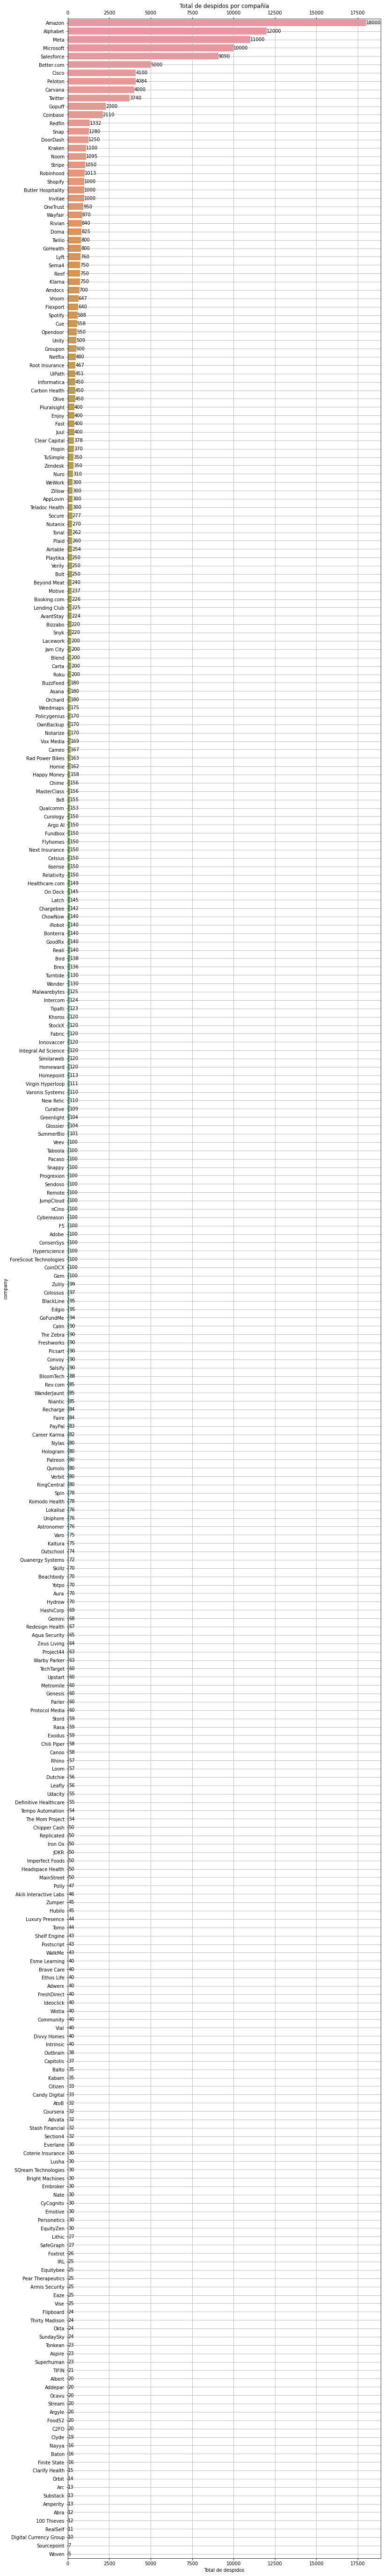

In [ ]:
# Exploración de los despidos por compañias, de mayor a menor
company_layoffs = (df.groupby(["company"])["total_layoffs"].sum()).sort_values(ascending=False)

# Grafico de barras 
plt.figure(figsize=(12,100))
ax = sns.barplot(x=company_layoffs, y=company_layoffs.index, orient="h")
ax.tick_params(top=True, labeltop=True, bottom=True, labelbottom=True)
ax.set_xlabel("Total de despidos")
ax.set_title("Total de despidos por compañía")
for i in ax.containers:
    ax.bar_label(i,)
ax.grid()

In [ ]:
# Generación de una tabla dinámica que contenga los despidos totales, los empleados totales y el % de despidos por compañía
df4 =(df.groupby("company")["total_layoffs","Empleados_totales"].sum()).sort_values("total_layoffs", ascending=False).reset_index()
df4["%_de_despidos"]=round((df4["total_layoffs"]/df4["Empleados_totales"])*100,2)
df4.head(20)

<ipython-input-47-80b55fe3892d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df4 =(df.groupby("company")["total_layoffs","Empleados_totales"].sum()).sort_values("total_layoffs", ascending=False).reset_index()


,company,total_layoffs,Empleados_totales,%_de_despidos
0,Amazon,18000,360000.00,5.0
1,Alphabet,12000,0.00,inf
2,Meta,11000,84615.38,13.0
3,Microsoft,10000,0.00,inf
4,Salesforce,9090,0.00,inf
5,Better.com,5000,10000.00,50.0
6,Cisco,4100,82000.00,5.0
7,Peloton,4084,0.00,inf
8,Carvana,4000,0.00,inf
9,Twitter,3740,5342.86,70.0


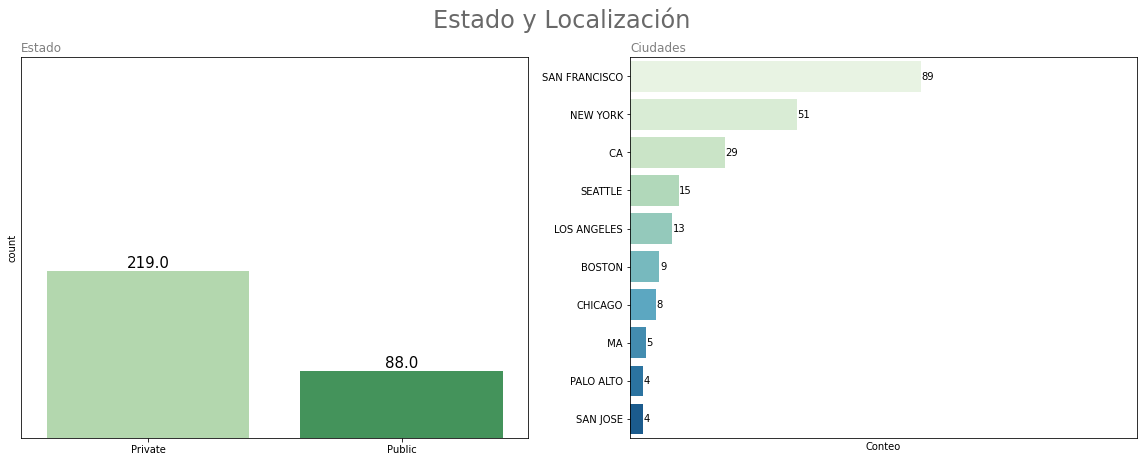

In [ ]:
# Gráfica del estado del sector y las ciudades más relevantes
typ_loc(df,'Estado y Localización')

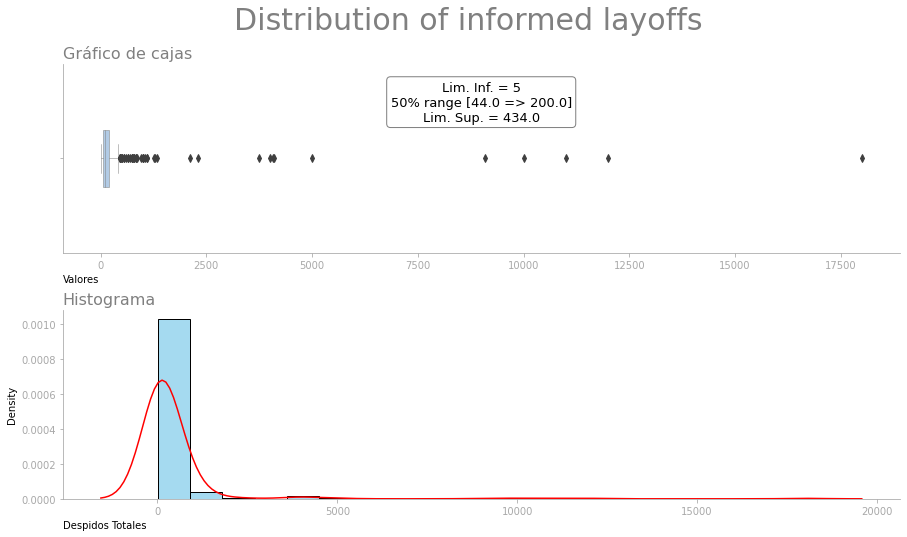

In [ ]:
# Gráfico de la distribución de los despidos totales en gráfico de cajas y por histograma con densidad
imagen_0(df['total_layoffs'], 'Despidos Totales','Distribution of informed layoffs')

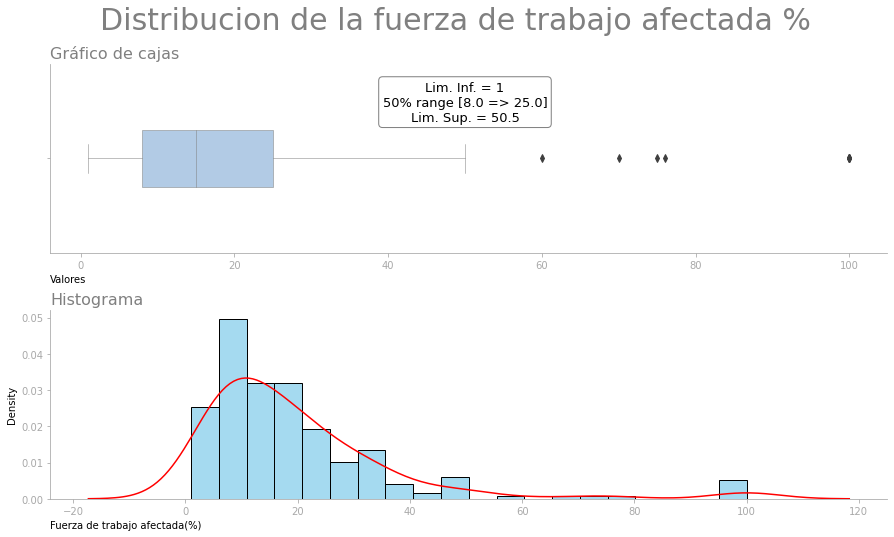

In [ ]:
# Gráfica de la distribución de la fuerza de trabajo afectada
imagen_0(df['impacted_workforce_percentage'], 'Fuerza de trabajo afectada(%)','Distribucion de la fuerza de trabajo afectada %')

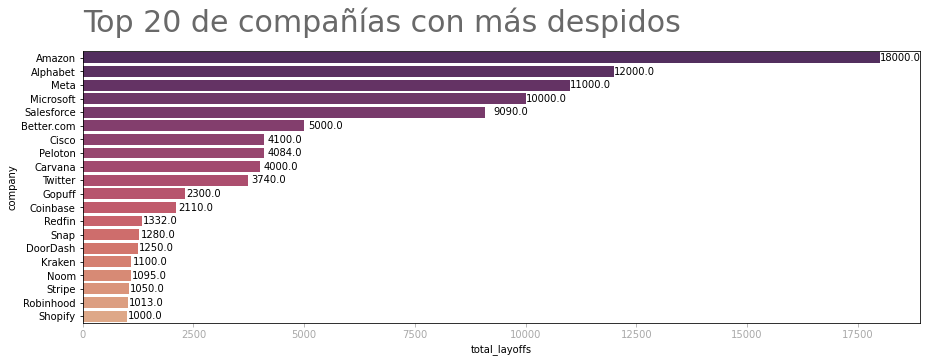

In [ ]:
# Gráfico de barras de las 20 compañías con más despidos
bar_company(df, 'Top 20 de compañías con más despidos',20)

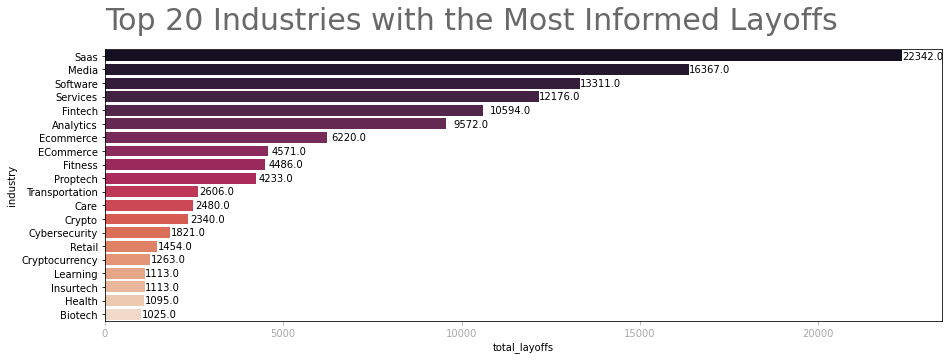

In [ ]:
# Gráfico de barras de las 20 industrias con más despidos
bar_field(df,'Top 20 Industries with the Most Informed Layoffs', 20)

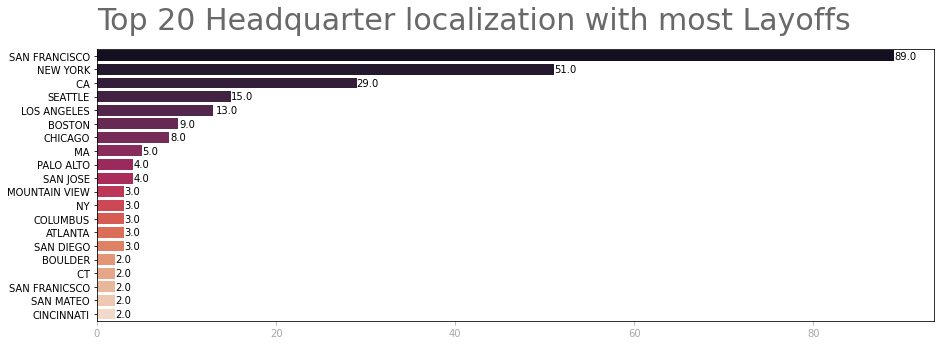

In [ ]:
# Gráfico de barras de las 20 localizaciones con más despidos
bar_loc(df,'Top 20 Headquarter localization with most Layoffs', 20)

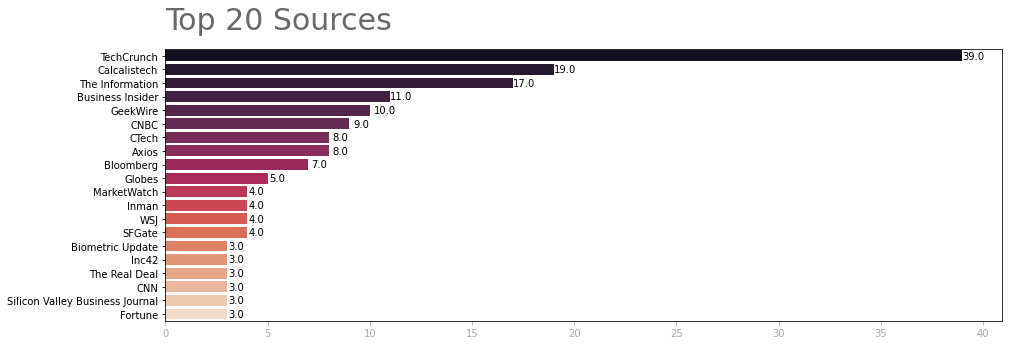

In [ ]:
# Gráfico de barras con las 20 fuentes donde más se anunciaron despidos
bar_sourc(df,'Top 20 Sources',20)

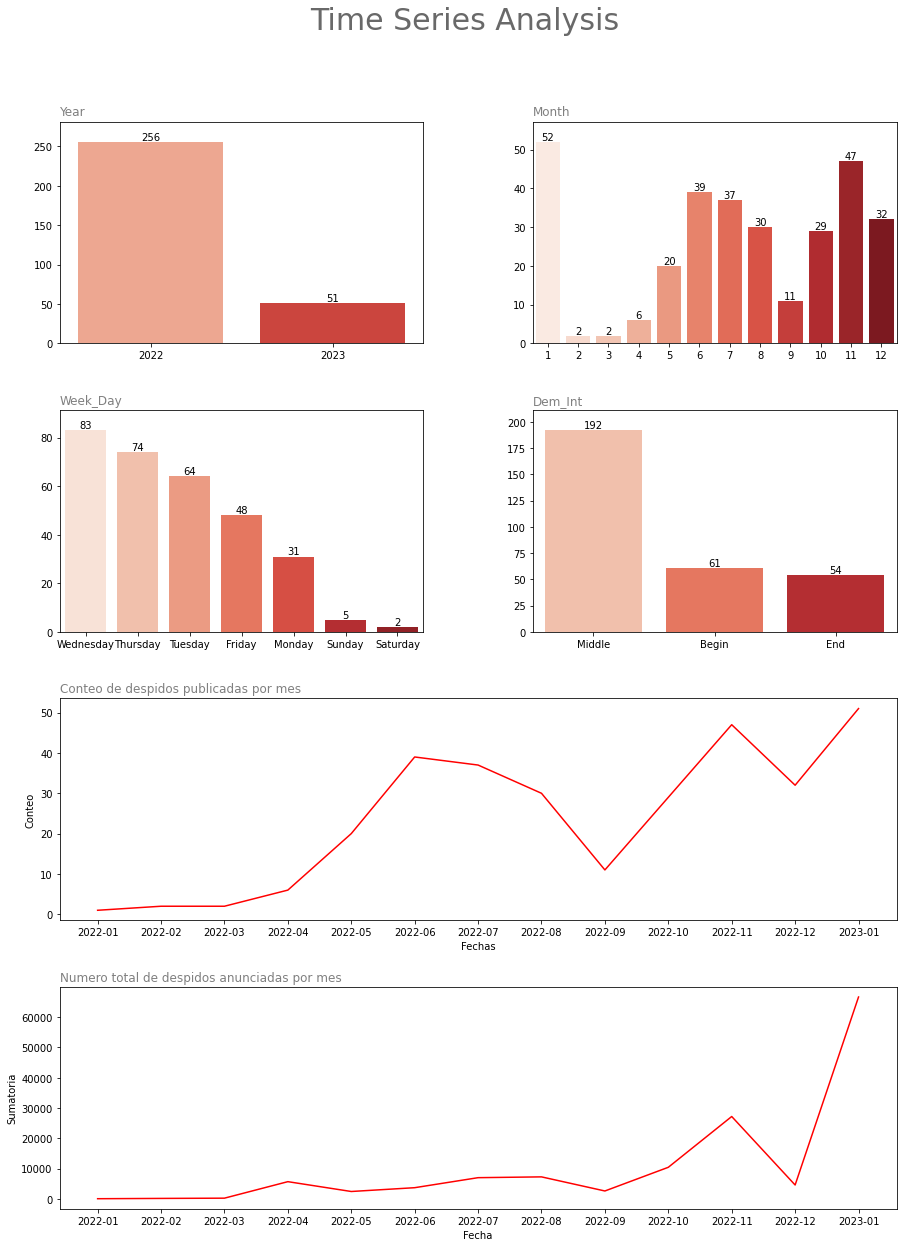

In [ ]:
# Análisis temporal de los despidos, por año, por mes, por día de semana, la altura del mes,
# y el conteo y la sumatoria de los despidos en el tiempo.
time_vis(df,'Time Series Analysis')

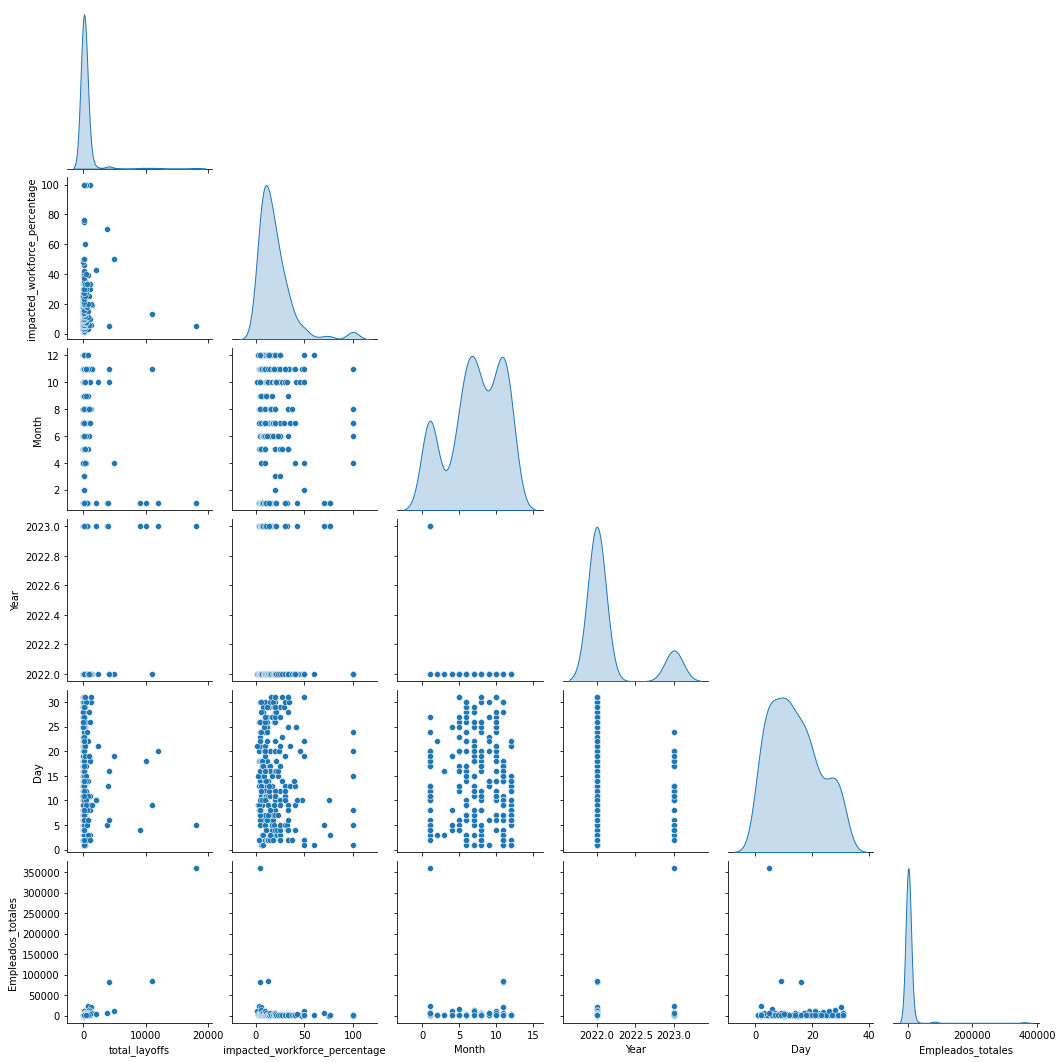

In [ ]:
# Exploración de la distribución de las variables
sns.pairplot(df, corner=True, diag_kind="kde")

## Creación de Modelo de ML

In [ ]:
# Importación de los módulos necesarios para armar nuestro/s modelo/s
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, r2_score,classification_report, confusion_matrix

In [ ]:
# Realizamos una copia del dataframe original para no pisarlo
df_copy = df.copy()
df_copy.head()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,Month,Year,Day,Week_Day,Dem_Int,Empleados_totales
0,C2FO,20,2.0,2022-12-09,Payments,KS,Kansas City Business Journal,Private,12,2022,9,Friday,Middle,1000.00
2,Amperity,13,3.0,2022-08-20,Analytics,SEATTLE,Geekwire,Private,8,2022,20,Saturday,Middle,433.33
3,Addepar,20,3.0,2023-01-18,Analytics,CA,Fortune,Private,1,2023,18,Wednesday,Middle,666.67
4,Thirty Madison,24,3.0,2022-05-13,Care,NEW YORK,Axios,Private,5,2022,13,Friday,Middle,800.00
6,Armis Security,25,4.0,2022-12-08,Cybersecurity,SAN FRANCISCO,Calcalistech,Private,12,2022,8,Thursday,Middle,625.00


In [ ]:
# Creación de un dataframe que contenga los despidos totales por compañía y ordenados de mayor a menor
df_layoffs_num = (df_copy.groupby(["company","total_layoffs"]).sum()).sort_values(by=["total_layoffs","impacted_workforce_percentage"], 
                                                                                    ascending=False).reset_index()
df_layoffs_num = df_layoffs_num.drop("Empleados_totales", axis=1)
df_layoffs_num

,company,total_layoffs,impacted_workforce_percentage,Month,Year,Day
0,Amazon,18000,5.0,1,2023,5
1,Alphabet,12000,0.0,1,2023,20
2,Meta,11000,13.0,11,2022,9
3,Microsoft,10000,0.0,1,2023,18
4,Salesforce,9090,0.0,1,2023,4
...,...,...,...,...,...,...
302,100 Thieves,12,0.0,1,2023,10
303,RealSelf,11,5.0,7,2022,21
304,Digital Currency Group,10,13.0,11,2022,2
305,Sourcepoint,7,13.0,6,2022,2


In [ ]:
# Creación de un dataframe que contenga sólo las columnas NO numéricas.
df_layoffs_cat = df_copy.select_dtypes(["object","datetime"])
df_layoffs_cat

,company,reported_date,industry,headquarter_location,sources,status,Week_Day,Dem_Int
0,C2FO,2022-12-09,Payments,KS,Kansas City Business Journal,Private,Friday,Middle
2,Amperity,2022-08-20,Analytics,SEATTLE,Geekwire,Private,Saturday,Middle
3,Addepar,2023-01-18,Analytics,CA,Fortune,Private,Wednesday,Middle
4,Thirty Madison,2022-05-13,Care,NEW YORK,Axios,Private,Friday,Middle
6,Armis Security,2022-12-08,Cybersecurity,SAN FRANCISCO,Calcalistech,Private,Thursday,Middle
...,...,...,...,...,...,...,...,...
480,HashiCorp,2023-01-11,Infrastructure,SAN FRANCISCO,Crunchbase News Reporting,Public,Wednesday,Middle
481,Quanergy Systems,2022-12-14,Vehicles,CA,Silicon Valley Business Journal,Public,Wednesday,Middle
482,Doma,2022-12-06,Learning,SAN FRANCSICO,Doma,Public,Tuesday,Middle
483,Wayfair,2022-08-19,Retail,BOSTON,Boston Globe,Public,Friday,Middle


In [ ]:
# Combinación de ambos dataframe en un sólo marco de datos con los datos ordenados según el total de despidos y la fuerza de trabajo afectada
df_layoffs_merged = pd.merge(df_layoffs_num, df_layoffs_cat, on=["company"])
df_layoffs_merged

,company,total_layoffs,impacted_workforce_percentage,Month,Year,Day,reported_date,industry,headquarter_location,sources,status,Week_Day,Dem_Int
0,Amazon,18000,5.0,1,2023,5,2023-01-05,Saas,SEATTLE,Wall Street Journal,Public,Thursday,Begin
1,Alphabet,12000,0.0,1,2023,20,2023-01-20,Services,CA,CNBC,Public,Friday,Middle
2,Meta,11000,13.0,11,2022,9,2022-11-09,Media,CA,CNBC,Public,Wednesday,Middle
3,Microsoft,10000,0.0,1,2023,18,2023-01-18,Software,SEATTLE,Microsoft,Public,Wednesday,Middle
4,Salesforce,9090,0.0,1,2023,4,2023-01-04,Analytics,SAN FRANCISCO,New York Times,Public,Wednesday,Begin
...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,100 Thieves,12,0.0,1,2023,10,2023-01-10,Media,LOS ANGELES,Dexerto,Private,Tuesday,Middle
309,RealSelf,11,5.0,7,2022,21,2022-07-21,Tech,SEATTLE,GeekWire,Private,Thursday,Middle
310,Digital Currency Group,10,13.0,11,2022,2,2022-11-02,Cryptocurrency,CT,Coindesk,Private,Wednesday,Begin
311,Sourcepoint,7,13.0,6,2022,2,2022-06-02,Tech,NEW YORK,Crunchbase News reporting,Private,Thursday,Begin


In [ ]:
# Creación de una función que me categorice el riesgo en Alto, Medio y Bajo en función del total de despidos.
def categorize_risk(row):
    if row["total_layoffs"] <= 100:
        return "Bajo"
    elif row["total_layoffs"] <= 500:
        return "Medio"
    else:
        return "Alto"

df_layoffs_merged["Risk_Category"] = df_layoffs_merged.apply(categorize_risk, axis=1)

In [ ]:
# Inspeccion de los cambios en el dataframe
df_layoffs_merged

,company,total_layoffs,impacted_workforce_percentage,Month,Year,Day,reported_date,industry,headquarter_location,sources,status,Week_Day,Dem_Int,Risk_Category
0,Amazon,18000,5.0,1,2023,5,2023-01-05,Saas,SEATTLE,Wall Street Journal,Public,Thursday,Begin,Alto
1,Alphabet,12000,0.0,1,2023,20,2023-01-20,Services,CA,CNBC,Public,Friday,Middle,Alto
2,Meta,11000,13.0,11,2022,9,2022-11-09,Media,CA,CNBC,Public,Wednesday,Middle,Alto
3,Microsoft,10000,0.0,1,2023,18,2023-01-18,Software,SEATTLE,Microsoft,Public,Wednesday,Middle,Alto
4,Salesforce,9090,0.0,1,2023,4,2023-01-04,Analytics,SAN FRANCISCO,New York Times,Public,Wednesday,Begin,Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,100 Thieves,12,0.0,1,2023,10,2023-01-10,Media,LOS ANGELES,Dexerto,Private,Tuesday,Middle,Bajo
309,RealSelf,11,5.0,7,2022,21,2022-07-21,Tech,SEATTLE,GeekWire,Private,Thursday,Middle,Bajo
310,Digital Currency Group,10,13.0,11,2022,2,2022-11-02,Cryptocurrency,CT,Coindesk,Private,Wednesday,Begin,Bajo
311,Sourcepoint,7,13.0,6,2022,2,2022-06-02,Tech,NEW YORK,Crunchbase News reporting,Private,Thursday,Begin,Bajo


### Modelo de Clasificación con RandomForest

In [ ]:
# Separación de las variables independientes y la dependiente
training_data = df_layoffs_merged[["industry", "total_layoffs", "status", "Risk_Category"]]
training_data = pd.get_dummies(training_data, columns=["industry","status"])
X_train, X_test, y_train, y_test = train_test_split(training_data.drop("Risk_Category", axis=1), training_data["Risk_Category"], test_size=0.2, random_state=42)

In [ ]:
# Instanciación del objeto RandomForestClassifier y entrenamiento del modelo
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
# Predicción con los datos de entrenamiento
y_train_pred = model.predict(X_train)
print(y_train_pred)

['Medio' 'Bajo' 'Bajo' 'Medio' 'Bajo' 'Bajo' 'Medio' 'Medio' 'Bajo' 'Alto'
 'Bajo' 'Medio' 'Bajo' 'Bajo' 'Medio' 'Bajo' 'Bajo' 'Bajo' 'Bajo' 'Bajo'
 'Bajo' 'Bajo' 'Medio' 'Bajo' 'Medio' 'Medio' 'Bajo' 'Bajo' 'Bajo' 'Bajo'
 'Medio' 'Medio' 'Bajo' 'Bajo' 'Medio' 'Bajo' 'Bajo' 'Bajo' 'Bajo' 'Medio'
 'Medio' 'Medio' 'Bajo' 'Alto' 'Medio' 'Medio' 'Bajo' 'Bajo' 'Medio'
 'Medio' 'Medio' 'Alto' 'Bajo' 'Bajo' 'Bajo' 'Bajo' 'Alto' 'Bajo' 'Medio'
 'Bajo' 'Medio' 'Medio' 'Bajo' 'Bajo' 'Bajo' 'Bajo' 'Bajo' 'Bajo' 'Bajo'
 'Bajo' 'Bajo' 'Bajo' 'Bajo' 'Alto' 'Bajo' 'Bajo' 'Bajo' 'Medio' 'Bajo'
 'Medio' 'Bajo' 'Bajo' 'Bajo' 'Bajo' 'Bajo' 'Alto' 'Medio' 'Bajo' 'Bajo'
 'Medio' 'Bajo' 'Bajo' 'Medio' 'Medio' 'Alto' 'Medio' 'Bajo' 'Medio'
 'Bajo' 'Bajo' 'Medio' 'Bajo' 'Bajo' 'Medio' 'Bajo' 'Medio' 'Bajo' 'Bajo'
 'Alto' 'Alto' 'Medio' 'Bajo' 'Bajo' 'Bajo' 'Medio' 'Bajo' 'Medio' 'Medio'
 'Bajo' 'Bajo' 'Bajo' 'Medio' 'Medio' 'Bajo' 'Medio' 'Alto' 'Bajo' 'Bajo'
 'Bajo' 'Alto' 'Bajo' 'Bajo' 'Medio' 'Bajo' 'Bajo'

In [ ]:
# Asertividad con los datos de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)
print(train_accuracy)

0.968


In [ ]:
# Testeo con nuevos datos, en este caso una muestra de los datos de prueba.
new_data = X_test.sample(1)
pred_prueba = model.predict(new_data)
pred_prueba

array(['Medio'], dtype=object)

In [ ]:
# Predicción con los datos de prueba
y_test_pred = model.predict(X_test)
print(y_test_pred)

['Medio' 'Alto' 'Bajo' 'Bajo' 'Medio' 'Alto' 'Bajo' 'Bajo' 'Bajo' 'Bajo'
 'Bajo' 'Medio' 'Bajo' 'Bajo' 'Bajo' 'Medio' 'Medio' 'Medio' 'Medio'
 'Bajo' 'Medio' 'Bajo' 'Bajo' 'Medio' 'Bajo' 'Medio' 'Bajo' 'Bajo' 'Medio'
 'Bajo' 'Bajo' 'Medio' 'Alto' 'Bajo' 'Medio' 'Medio' 'Bajo' 'Bajo' 'Medio'
 'Bajo' 'Medio' 'Medio' 'Medio' 'Bajo' 'Bajo' 'Bajo' 'Bajo' 'Bajo' 'Medio'
 'Bajo' 'Medio' 'Medio' 'Bajo' 'Bajo' 'Medio' 'Medio' 'Bajo' 'Medio'
 'Medio' 'Bajo' 'Bajo' 'Bajo' 'Bajo']


In [ ]:
# Asertividad con los datos de prueba
test_accuracy = accuracy_score(y_test, y_test_pred)
print(test_accuracy)

0.8888888888888888


Accuracy del modelo de RandomForestClassifier : 0.97
Rporte del modelo de RandomForestClassifier:
               precision    recall  f1-score   support

        Alto       1.00      0.74      0.85        31
        Bajo       0.97      1.00      0.99       143
       Medio       0.95      1.00      0.97        76

    accuracy                           0.97       250
   macro avg       0.97      0.91      0.94       250
weighted avg       0.97      0.97      0.97       250



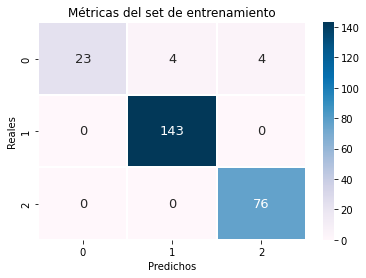

In [ ]:
# Visualización de la matriz de confusión del set de entrenamiento.
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25, 
           annot_kws={'size':13} )
plt.xlabel('Predichos')
plt.ylabel('Reales')
plt.title("Métricas del set de entrenamiento")

print(f'Accuracy del modelo de {model.__class__.__name__} : {accuracy_score(y_train, y_train_pred):.2f}')
print(f'Rporte del modelo de {model.__class__.__name__}:\n {classification_report(y_train, y_train_pred)}')

Accuracy del modelo de RandomForestClassifier : 0.89
Rporte del modelo de RandomForestClassifier:
               precision    recall  f1-score   support

        Alto       1.00      0.38      0.55         8
        Bajo       0.94      1.00      0.97        33
       Medio       0.80      0.91      0.85        22

    accuracy                           0.89        63
   macro avg       0.91      0.76      0.79        63
weighted avg       0.90      0.89      0.87        63



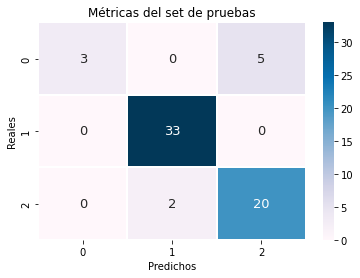

In [ ]:
# Visualización de la matriz de confusión del set de prueba.
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25, 
           annot_kws={'size':13} )
plt.xlabel('Predichos')
plt.ylabel('Reales')
plt.title("Métricas del set de pruebas")

print(f'Accuracy del modelo de {model.__class__.__name__} : {accuracy_score(y_test, y_test_pred):.2f}')
print(f'Rporte del modelo de {model.__class__.__name__}:\n {classification_report(y_test, y_test_pred)}')

### Optimizando nuestro modelo de clasificación con GridSearch

In [ ]:
# Generando la grilla de parámetros
params = {
  "n_estimators":[50,100,500],
  "max_depth":[5,10,20],
  "min_samples_split":[5,7,10],
  "criterion":["gini","entropy","log_loss"]
}

# Instanciación del objeto GridSerachCV
grid = GridSearchCV(model, params, cv=5)

In [ ]:
# Entrenamiento de la grilla
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 20],
                         'min_samples_split': [5, 7, 10],
                         'n_estimators': [50, 100, 500]})

In [ ]:
# Mejor puntaje de la grilla
grid.best_score_

0.976

In [ ]:
# Mejores parámetros de la grilla
grid.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_split': 7,
 'n_estimators': 500}

In [ ]:
# Creación de un nuevo modelo RandomForestClassifier pero con los parámetros con mejor rendimiento en el GridSearch.
optimized_rfc = RandomForestClassifier(criterion="gini", max_depth=20, min_samples_split=7, n_estimators=500)
optimized_rfc.fit(X_train, y_train)

# Predicción y Asertividad del set de entrenamiento.
y_train_pred_optimized  = optimized_rfc.predict(X_train)
y_train_accuracy_optimized = accuracy_score(y_train, y_train_pred_optimized)
y_train_accuracy_optimized

1.0

Accuracy del modelo de RandomForestClassifier optimizado: 1.00
Rporte del modelo de RandomForestClassifier optimizado:
               precision    recall  f1-score   support

        Alto       1.00      1.00      1.00        31
        Bajo       1.00      1.00      1.00       143
       Medio       1.00      1.00      1.00        76

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



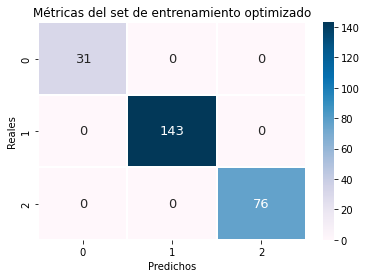

In [ ]:
# Visualización de la matriz de confusión del set de entrenamiento del RandomForestClassifier optimizado.
sns.heatmap(confusion_matrix(y_train, y_train_pred_optimized), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25, 
           annot_kws={'size':13} )
plt.xlabel('Predichos')
plt.ylabel('Reales')
plt.title("Métricas del set de entrenamiento optimizado")

print(f'Accuracy del modelo de {model.__class__.__name__} optimizado: {accuracy_score(y_train, y_train_pred_optimized):.2f}')
print(f'Rporte del modelo de {model.__class__.__name__} optimizado:\n {classification_report(y_train, y_train_pred_optimized)}')

In [ ]:
# Predicción y Asertividad del set de prueba.
y_test_pred_optimized  = optimized_rfc.predict(X_test)
y_test_accuracy_optimized = accuracy_score(y_test, y_test_pred_optimized)
y_test_accuracy_optimized

1.0

Accuracy del modelo de RandomForestClassifier optimizado: 1.00
Rporte del modelo de RandomForestClassifier optimizado:
               precision    recall  f1-score   support

        Alto       1.00      1.00      1.00         8
        Bajo       1.00      1.00      1.00        33
       Medio       1.00      1.00      1.00        22

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



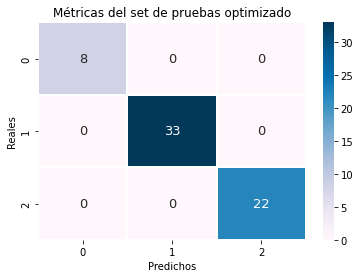

In [ ]:
# Visualización de la matriz de confusión del set de prueba del RandomForestClassifier optimizado.
sns.heatmap(confusion_matrix(y_test, y_test_pred_optimized), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25, 
           annot_kws={'size':13} )
plt.xlabel('Predichos')
plt.ylabel('Reales')
plt.title("Métricas del set de pruebas optimizado")

print(f'Accuracy del modelo de {model.__class__.__name__} optimizado: {accuracy_score(y_test, y_test_pred_optimized):.2f}')
print(f'Rporte del modelo de {model.__class__.__name__} optimizado:\n {classification_report(y_test, y_test_pred_optimized)}')

### Modelo de Regresión con LinearRegression

In [ ]:
# Preprocesamiento de datos
data = df_layoffs_merged[["company","industry","Month", "status","Risk_Category","total_layoffs"]]
data = pd.get_dummies(data, columns=["company","industry", "status","Risk_Category"])

escaler = StandardScaler()
escaled_data = escaler.fit_transform(data)
escaled_data = pd.DataFrame(escaled_data, columns = data.columns)

# Separar los datos en conjuntos de entrenamiento y prueba
X = escaled_data.drop('total_layoffs', axis=1)
y = escaled_data['total_layoffs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo y entrenarlo
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluar el modelo
y_train_pred = lr.predict(X_train)
train_error = mean_squared_error(y_train, y_train_pred)
train_error

y_test_pred = lr.predict(X_test)
test_error = mean_squared_error(y_test, y_test_pred)
test_error

mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test,y_test_pred )
r2_test = r2_score(y_test, y_test_pred)

print(f'MSE - Train Set: {train_error:.2f}')
print(f'MAE - Train Set: {mae_train:.2f}')
print(f'R2 - Train Set: {r2_train:.2f}')

print(f'MSE - Test Set: {test_error:.2f}')
print(f'MAE - Test Set: {mae_test:.2f}')
print(f'R2 - Test Set: {r2_test:.2f}')

MSE - Train Set: 0.00
MAE - Train Set: 0.00
R2 - Train Set: 1.00
MSE - Test Set: 6489271144309746999230464.00
MAE - Test Set: 624502764246.22
R2 - Test Set: -7629495011123828654866432.00


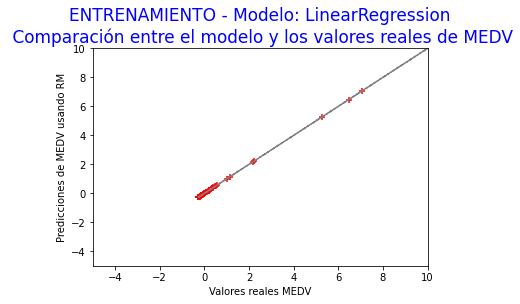

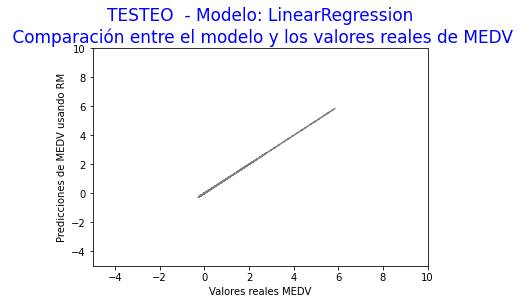

In [ ]:
plt.plot(y_train, y_train, '-.',c='grey')
plt.scatter(y_train, y_train_pred, s=30, c='r', marker='+')
plt.ylabel("Predicciones de MEDV usando RM")
plt.xlabel("Valores reales MEDV")
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.title('ENTRENAMIENTO - Modelo: ' + lr.__class__.__name__ 
        + '\n Comparación entre el modelo y los valores reales de MEDV', fontsize=17, color='b')
plt.show()

plt.plot(y_test, y_test, '-.',c='grey')
plt.scatter(y_test, y_test_pred, s=30, c='r', marker='+')
plt.ylabel("Predicciones de MEDV usando RM")
plt.xlabel("Valores reales MEDV")
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.title('TESTEO  - Modelo: ' + lr.__class__.__name__
        + '\n Comparación entre el modelo y los valores reales de MEDV', fontsize=17, color='b')
plt.show()

### Modelo de Regresión con Random Forest

In [ ]:
# Preprocesamiento de datos
data = df_layoffs_merged[["company","industry","Month", "status","Risk_Category","total_layoffs"]]
data = pd.get_dummies(data, columns=["company","industry", "status","Risk_Category"])

escaler = StandardScaler()
escaled_data = escaler.fit_transform(data)
escaled_data = pd.DataFrame(escaled_data, columns = data.columns)

# Separar los datos en conjuntos de entrenamiento y prueba
X = escaled_data.drop('total_layoffs', axis=1)
y = escaled_data['total_layoffs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo y entrenarlo
rfr = RandomForestRegressor(criterion="absolute_error", n_estimators=500, min_samples_split=7, max_depth=20)
rfr.fit(X_train, y_train)

# Evaluar el modelo
y_train_pred = rfr.predict(X_train)
train_error = mean_squared_error(y_train, y_train_pred)
train_error

y_test_pred = rfr.predict(X_test)
test_error = mean_squared_error(y_test, y_test_pred)
test_error

mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test,y_test_pred )
r2_test = r2_score(y_test, y_test_pred)

print(f'MSE - Train Set: {train_error:.2f}')
print(f'MAE - Train Set: {mae_train:.2f}')
print(f'R2 - Train Set: {r2_train:.2f}')

print(f'MSE - Test Set: {test_error:.2f}')
print(f'MAE - Test Set: {mae_test:.2f}')
print(f'R2 - Test Set: {r2_test:.2f}')

MSE - Train Set: 0.12
MAE - Train Set: 0.07
R2 - Train Set: 0.89
MSE - Test Set: 0.72
MAE - Test Set: 0.22
R2 - Test Set: 0.15


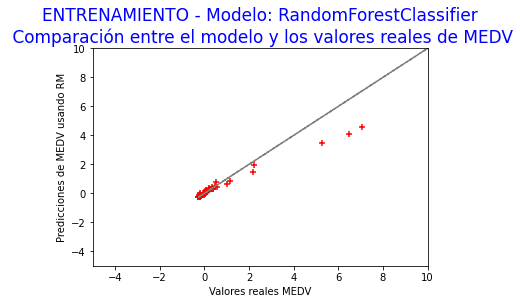

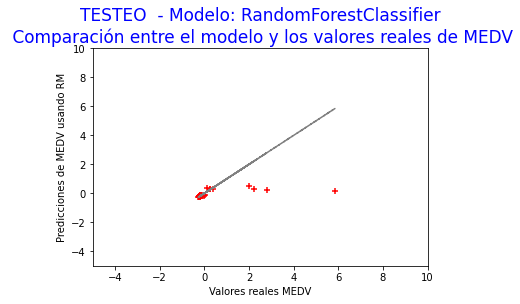

In [ ]:
plt.plot(y_train, y_train, '-.',c='grey')
plt.scatter(y_train, y_train_pred, s=30, c='r', marker='+')
plt.ylabel("Predicciones de MEDV usando RM")
plt.xlabel("Valores reales MEDV")
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.title('ENTRENAMIENTO - Modelo: ' + model.__class__.__name__ 
        + '\n Comparación entre el modelo y los valores reales de MEDV', fontsize=17, color='b')
plt.show()

plt.plot(y_test, y_test, '-.',c='grey')
plt.scatter(y_test, y_test_pred, s=30, c='r', marker='+')
plt.ylabel("Predicciones de MEDV usando RM")
plt.xlabel("Valores reales MEDV")
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.title('TESTEO  - Modelo: ' + model.__class__.__name__
        + '\n Comparación entre el modelo y los valores reales de MEDV', fontsize=17, color='b')
plt.show()

### Modelo de Regresión con XGBoost

In [ ]:
# Preprocesamiento de datos
data = df_layoffs_merged[["company","industry","Month", "status","Risk_Category","total_layoffs"]]
data = pd.get_dummies(data, columns=["company","industry", "status","Risk_Category"])

escaler = StandardScaler()
escaled_data = escaler.fit_transform(data)
escaled_data = pd.DataFrame(escaled_data, columns = data.columns)

# Separar los datos en conjuntos de entrenamiento y prueba
X = escaled_data.drop('total_layoffs', axis=1)
y = escaled_data['total_layoffs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgbr.fit(X_train, y_train)

# Evaluar el modelo
y_train_pred = xgbr.predict(X_train)
train_error = mean_squared_error(y_train, y_train_pred)
train_error

y_test_pred = xgbr.predict(X_test)
test_error = mean_squared_error(y_test, y_test_pred)
test_error

mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test,y_test_pred )
r2_test = r2_score(y_test, y_test_pred)

print(f'MSE - Train Set: {train_error:.2f}')
print(f'MAE - Train Set: {mae_train:.2f}')
print(f'R2 - Train Set: {r2_train:.2f}')

print(f'MSE - Test Set: {test_error:.2f}')
print(f'MAE - Test Set: {mae_test:.2f}')
print(f'R2 - Test Set: {r2_test:.2f}')

MSE - Train Set: 0.00
MAE - Train Set: 0.01
R2 - Train Set: 1.00
MSE - Test Set: 0.69
MAE - Test Set: 0.22
R2 - Test Set: 0.19


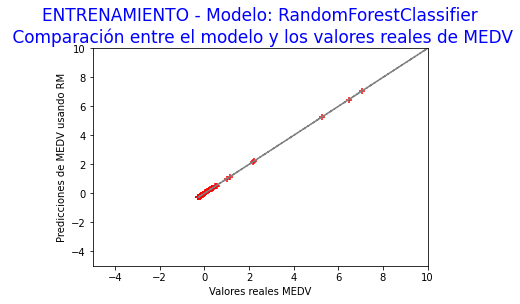

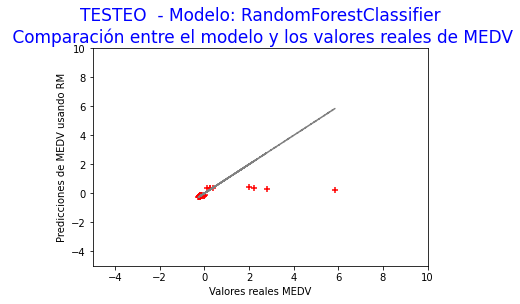

In [ ]:
plt.plot(y_train, y_train, '-.',c='grey')
plt.scatter(y_train, y_train_pred, s=30, c='r', marker='+')
plt.ylabel("Predicciones de MEDV usando RM")
plt.xlabel("Valores reales MEDV")
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.title('ENTRENAMIENTO - Modelo: ' + model.__class__.__name__ 
        + '\n Comparación entre el modelo y los valores reales de MEDV', fontsize=17, color='b')
plt.show()

plt.plot(y_test, y_test, '-.',c='grey')
plt.scatter(y_test, y_test_pred, s=30, c='r', marker='+')
plt.ylabel("Predicciones de MEDV usando RM")
plt.xlabel("Valores reales MEDV")
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.title('TESTEO  - Modelo: ' + model.__class__.__name__
        + '\n Comparación entre el modelo y los valores reales de MEDV', fontsize=17, color='b')
plt.show()